# Advertising Sales Channel Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

# Checking Null Values

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

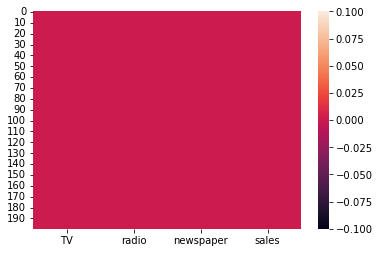

In [9]:
sns.heatmap(df.isnull())

Obs: No missing values in the data

# Checking duplicates:

In [10]:
df.duplicated().sum()

0

Obs : No duplicates present in data

# EDA

# Descriptive Statistics

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualization of Data

# Checking Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

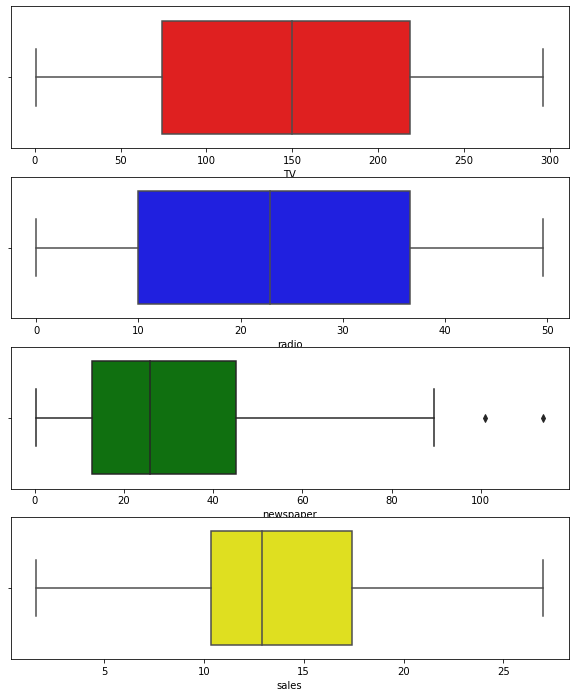

In [12]:
#checking for the outliers
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
sns.boxplot(x= df.TV,color='red')

plt.subplot(4,1,2)
sns.boxplot(x= df.radio,color='blue')

plt.subplot(4,1,3)
sns.boxplot(x= df.newspaper,color='green')

plt.subplot(4,1,4)
sns.boxplot(x= df.sales,color='yellow')

plt.show

Obs :
    Newspaper column has outliers

# Pairplot

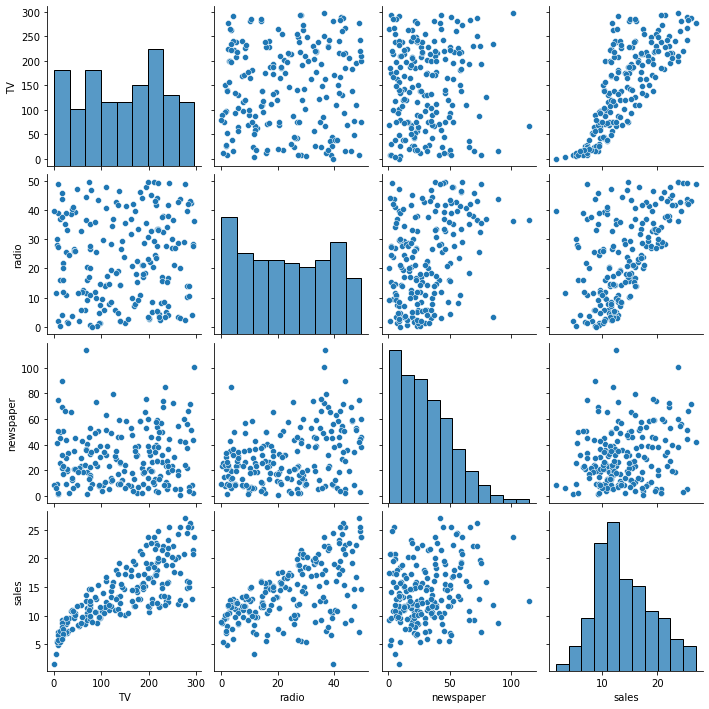

In [13]:
sns.pairplot(df)

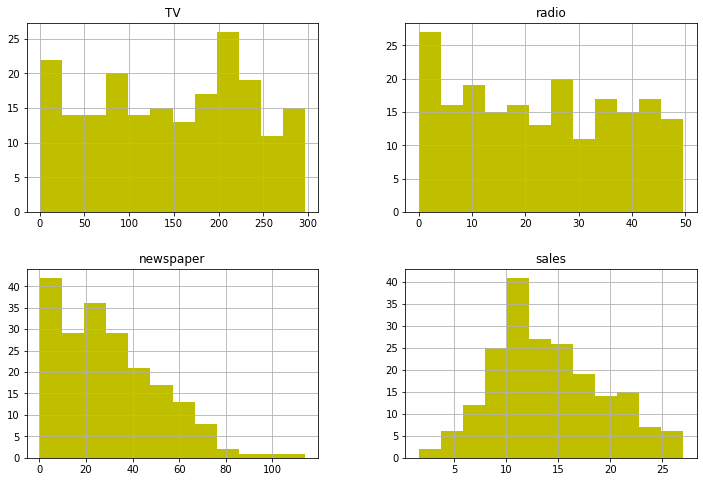

In [14]:
df.hist( bins = 12, figsize = (12,8),color='y')
plt.show()

Obs:Spending is more on TV and Radio than on Newspaper

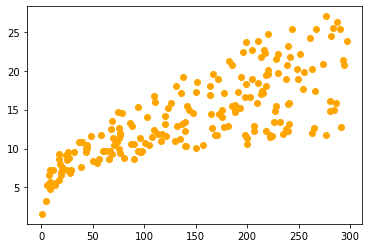

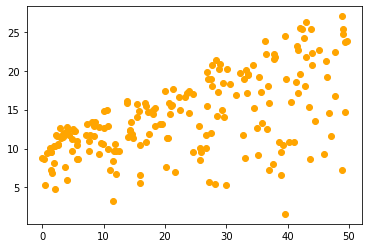

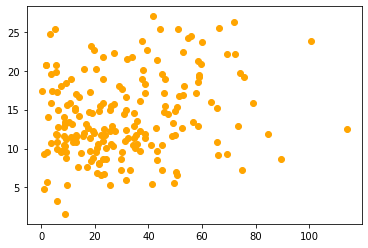

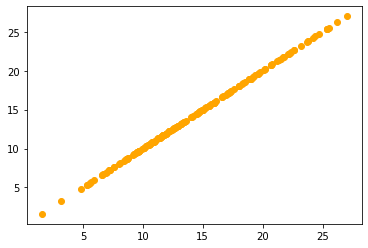

In [15]:
for i in df:
    plt.scatter(x=df[i], y=df['sales'], c='orange')
    plt.show()   # plotting pair plots separately of columns vs target to understand better

Obs: As we can clearly see Tv has more impact on sales followed by radio then by newspaper

<AxesSubplot:xlabel='TV', ylabel='sales'>

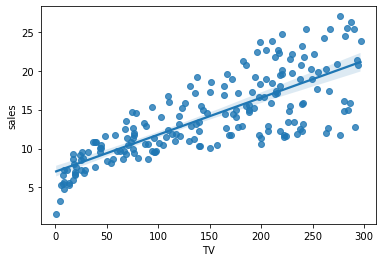

In [16]:
sns.regplot(x='TV',y='sales',data=df)

Obs:
    Tv and sales have positive linear relationship

<AxesSubplot:xlabel='radio', ylabel='sales'>

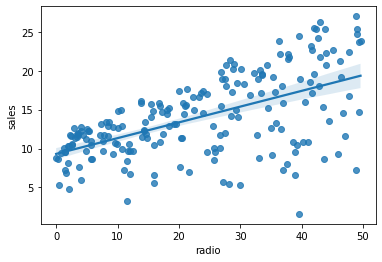

In [17]:
sns.regplot(x='radio',y='sales',data=df)

Obs: Radio and sale have linear relationship

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

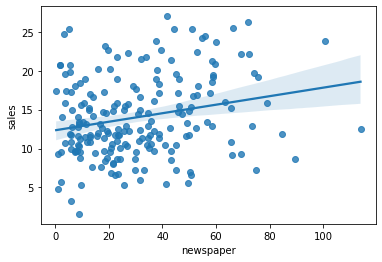

In [18]:
sns.regplot(x='newspaper',y='sales',data=df)

Obs: Newspaper and sales have less considerable relationship

# Checking Skewness

TV = -0.06932836662244649


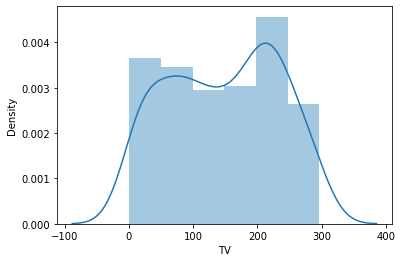

radio = 0.0934668451108453


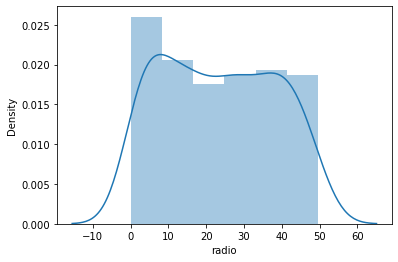

newspaper = 0.8879959753085498


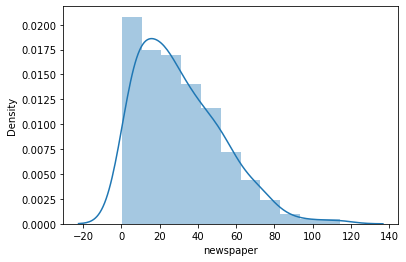

sales = 0.4045082487061191


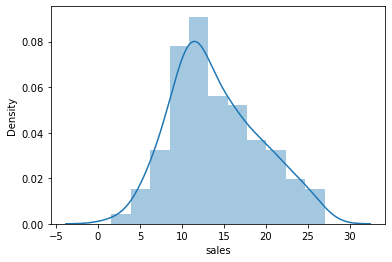

In [19]:
from scipy.stats import skew
for i in df:
    print(i, "=", skew(df[i]))
    sns.distplot(df[i])
    plt.show()

Obs: Tv and radio have normalized distribution whereas Newspaper is right skewed

# Checking Correlation:
    

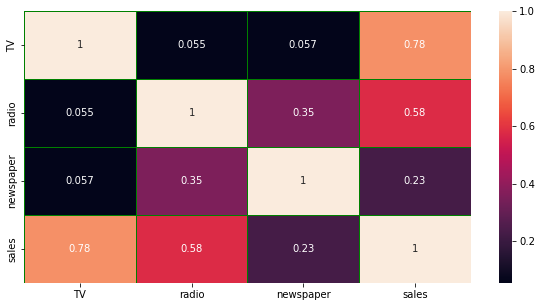

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor= "green")
plt.show()

Obs:
    Tv and radio are highly correlated with sales and newspaper is slightly less correlated with sales.

# Checking Multicollinearity

In [21]:
x = df.drop('sales',axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [24]:
calc_vif(x)

,variables,VIF FACTOR
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


Obs: Multicollinearity found ok. Vif factor is below 10

# Removing Outliers

In [25]:
from scipy.stats import zscore
z= np.array(abs(zscore(df)))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [26]:
threshold= 3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [27]:
z[16][2]

3.8411707150992718

In [28]:
z[101][2]

3.238153957342154

In [29]:
df.iloc[16]

TV            67.8
radio         36.6
newspaper    114.0
sales         12.5
Name: 16, dtype: float64

In [30]:
df.iloc[101]

TV           296.4
radio         36.3
newspaper    100.9
sales         23.8
Name: 101, dtype: float64

In [31]:
# removing two rows out of 200 rows
df_new=df.drop([16,101],axis=0)
df_new.shape


(198, 4)

In [32]:
data_loss= ((200-198)/200)*100
data_loss

1.0

we have lost only 1% of data in removing outliers

# Removing Skewness

In [33]:
df_new['newspaper']= np.sqrt(df_new['newspaper'])
skew(df_new['newspaper'])

-0.040340871727186554

In [34]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

We can see all skewness values are in range -0.5 to 0.5 Hence skewness is removed

# Splitting the DataFrame in feature and target Column

In [35]:
x= df_new.drop('sales', axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [36]:
y = df_new['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Satandardization of data using Standard Scaler

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

In [39]:
x.mean()   #which is approximately zero

-4.186699621482072e-17

In [40]:
x.std()    # which is aprroximately unity

0.9999999999999999

In [41]:
y=sc.fit_transform(y.values.reshape(-1,1))
y

array([[ 1.56651666],
       [-0.69088101],
       [-0.90311498],
       [ 0.87193276],
       [-0.20853108],
       [-1.30828892],
       [-0.42076505],
       [-0.15064909],
       [-1.77134485],
       [-0.65229302],
       [-1.03817296],
       [ 0.65969879],
       [-0.92240898],
       [-0.82593899],
       [ 0.96840275],
       [ 1.62439865],
       [ 2.01027859],
       [-0.51723504],
       [ 0.11946687],
       [ 0.77546277],
       [-0.28570707],
       [-1.61699287],
       [ 0.29311285],
       [-0.82593899],
       [-0.38217705],
       [ 0.19664286],
       [ 0.37028883],
       [ 0.94910875],
       [-0.67158701],
       [ 1.43145868],
       [-0.40147105],
       [-0.84523299],
       [ 0.65969879],
       [-0.86452698],
       [-0.22782508],
       [ 2.20321856],
       [ 0.13876087],
       [-0.748763  ],
       [ 1.45075268],
       [ 0.50534681],
       [ 0.6018168 ],
       [ 1.2964007 ],
       [-0.20853108],
       [-1.05746696],
       [ 0.17734886],
       [-0

# Training the data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

As the data is continuous we will use linear regression model

In [43]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.8899808679263099
At random state 0,the testing accuracy is: 0.9104353676454642


At random state 1,the training accuracy is: 0.8945018460466634
At random state 1,the testing accuracy is: 0.8915808201402337


At random state 2,the training accuracy is: 0.9104895320853252
At random state 2,the testing accuracy is: 0.8385093780102322


At random state 3,the training accuracy is: 0.8945008732306111
At random state 3,the testing accuracy is: 0.8977495614063602


At random state 4,the training accuracy is: 0.8980063011610756
At random state 4,the testing accuracy is: 0.8726744168845624


At random state 5,the training accuracy is: 0.8993019881675024
At random state 5,the testing accuracy is: 0.8622409600064913


At random state 6,the training accuracy is: 0.8991574664390982
At random state 6,the testing accuracy is: 0.8766949131606819


At random state 7,the training accuracy is: 0.890944609101688
At random state 7,the testing accuracy is: 0.9063

At random state 65,the testing accuracy is: 0.8828637466180443


At random state 66,the training accuracy is: 0.9001082700395925
At random state 66,the testing accuracy is: 0.876330270283092


At random state 67,the training accuracy is: 0.8915025477235988
At random state 67,the testing accuracy is: 0.9058168794622784


At random state 68,the training accuracy is: 0.9028493757450912
At random state 68,the testing accuracy is: 0.8641483684931222


At random state 69,the training accuracy is: 0.8915063040754968
At random state 69,the testing accuracy is: 0.9060630749933309


At random state 70,the training accuracy is: 0.8834039435694678
At random state 70,the testing accuracy is: 0.9232879755887871


At random state 71,the training accuracy is: 0.9093852989222347
At random state 71,the testing accuracy is: 0.8075682042626334


At random state 72,the training accuracy is: 0.8879096413808881
At random state 72,the testing accuracy is: 0.9204939440753833


At random state 73,the training a

Selecting random state 40 as it has given equally best testing and training accuracy 

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

# Training the data using various model

# 1. Linear Regression

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LR is', train_score)
print('The test accuracy of LR is', test_score)
print('\n')    

The training accuracy of LR is 0.8938831948100018
The test accuracy of LR is 0.8932663650180765




We need to try other models to check if 89% accuracy is good or not

In [46]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 0.2344516606151644
Mean squared error :  0.09928032844715974
Root mean squared error: 0.31508781069276504


In [47]:
lr.coef_

array([[7.49762981e-01, 5.65493448e-01, 4.21319042e-04]])

In [48]:
lr.intercept_

array([-0.02301285])

# 2. SVR

In [49]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8885437885057779
0.8280976517658589
0.9759461845952258


kenerl= rbf gives best results. we select kernel= rbf

In [50]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.9759461845952258
The test accuracy of SVR is 0.9732087391392951


it is giving relativly good score if compared to linear regression. lets check for Decision tree to choose better

In [51]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 0.10116186954843434
Mean squared error :  0.024920402815989555
Root mean squared error: 0.15786197393922818


# 3. Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9543165986776726


Training accuracy is 1 but testing accuracy is not good as compared to other regressor models

In [53]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 0.15435197730706346
Mean squared error :  0.04249328797461276
Root mean squared error: 0.206139001585369


# 4. Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.996528485070543
The test accuracy of RF is 0.9889539906817267


Uptill now this is the best score in all 4 models of training the data

In [55]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 0.08294007030609238
Mean squared error :  0.010274656469202883
Root mean squared error: 0.10136398013694452


# 5. KNeighbors Regressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_train= knr.predict(x_train)
pred_test = knr.predict(x_test)
train_score = r2_score(y_train,pred_train)
test_score = r2_score(y_test,pred_test)
print('The training accuracy of KNR is', train_score)
print('The test accuracy of KNR is', test_score)

The training accuracy of KNR is 0.9535931403533513
The test accuracy of KNR is 0.9542209496814744


As we can see Random forest has more better scores

In [57]:
print("Error Calculations:")
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error : ",mean_squared_error(y_test, pred_test))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred_test)))

Error Calculations:
Mean absolute error : 0.13380387032806063
Mean squared error :  0.04258225771465594
Root mean squared error: 0.20635468910266114


After testing we find the Random Forest Regressor gives best result with less error value so we select RandomForestRegressor

# Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
model=(lr,dt,sv,rf,knr)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.8857406146589945


Mean Accuracy of DecisionTreeRegressor()
0.9569317582191841


Mean Accuracy of SVR()
0.9655573415768641


Mean Accuracy of RandomForestRegressor()
0.9759034212797253


Mean Accuracy of KNeighborsRegressor()
0.9358043941034188




In [60]:
Performance_table=pd.DataFrame({'Model':['LR','SVR','DTR','RFR','KNR'],
           'Trainig Score':[0.89,0.91,1.0,0.99,0.95],
           'Testing score':[0.89,0.89,0.92,0.98,0.95],
           'CV Score':[0.88,0.87, 0.95, 0.97,0.93]})

In [61]:
Performance_table

,Model,Trainig Score,Testing score,CV Score
0,LR,0.89,0.89,0.88
1,SVR,0.91,0.89,0.87
2,DTR,1.00,0.92,0.95
3,RFR,0.99,0.98,0.97
4,KNR,0.95,0.95,0.93


Hence RandomForest gives better results

In [62]:
Error_table= pd.DataFrame({'Model':['LR','SVR','DTR','RFR','KNR'],
                           'Mean absolute error':[0.23,0.10,0.15,0.09,0.13],
                           'Mean squared error':[0.10,0.02,0.04,0.01,0.04],
                           'Root mean squared error':[0.31,0.16,0.20,0.10,0.20]})

In [63]:
Error_table

,Model,Mean absolute error,Mean squared error,Root mean squared error
0,LR,0.23,0.10,0.31
1,SVR,0.10,0.02,0.16
2,DTR,0.15,0.04,0.20
3,RFR,0.09,0.01,0.10
4,KNR,0.13,0.04,0.20


Hence Randomforest has less error 

# Normalization

In [64]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [65]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [66]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9001811815516825

In [67]:
cv_score=cross_val_score(ls,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.8716997494238828

Hence we got 90% training and 87% training through CV through lasso

# HyperTuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={'max_features':['auto','sqrt','log2'],'criterion':['mse','mae'],'max_depth':np.arange(2,10)}

In [70]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)

In [71]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [72]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto'}

Using above results of Gridsearch Cv we will prepare the model using above parameters

# Final Model preparation

In [73]:
final_model=RandomForestRegressor(criterion='mae', max_depth= 8, max_features= 'auto')
final_model.fit(x_train,y_train)
pred_final=final_model.predict(x_test)
rfs=r2_score(y_test,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(final_model,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 99.08852014444399
Cross Val score 97.67524235476492


Hence our training accuracy is 99.1% and cross val score is 97%

# Visualizing the Final Model

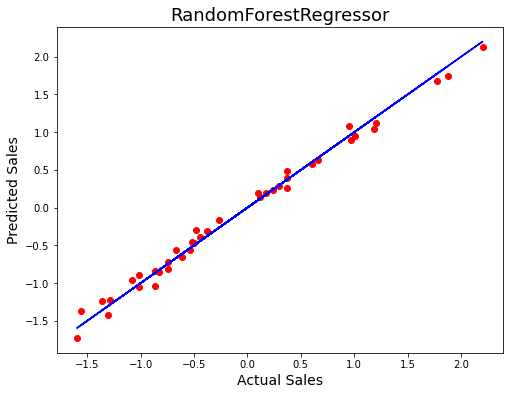

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_final,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

As we can see the line fits the predicted values

# Saving the Model:

In [75]:
import joblib
joblib.dump(final_model,'Advertising_Sales.obj')

['Advertising_Sales.obj']

In [76]:
loaded_model = joblib.load(open('Advertising_Sales.obj','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

99.08852014444399


In [77]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], pred_final[:]], index=["Predicted", "Orignal"])

In [78]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,0.282019,-1.418072,0.388136,2.13405,-1.055345,0.187189,1.740838,-1.037015,-1.226868,-1.374467,...,-0.834235,1.684596,-0.957813,0.199151,0.628925,0.581365,-0.455108,0.483255,1.079054,-0.813108
Orignal,0.282019,-1.418072,0.388136,2.13405,-1.055345,0.187189,1.740838,-1.037015,-1.226868,-1.374467,...,-0.834235,1.684596,-0.957813,0.199151,0.628925,0.581365,-0.455108,0.483255,1.079054,-0.813108
